## Energy and angular dispersive analysis

`refnx` able to deal with reflectivity from systems containing energy dispersive materials, i.e. those whose optical properties change as a function of wavelength. For neutrons this mainly corresponds to elements with strong absorption effects. The treatment below is also able to deal with energy dispersive X-ray measurements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from refnx.reflect import ReflectModelTL, ReflectModel, SLD, MaterialSLD
from refnx.util import q, xray_wavelength

Start off by creating a `MaterialSLD`. This is a variant of `Scatterer`, whose optical properties are controlled by a formula, mass density (g/cc), and whether the material is being used for neutron or X-ray calculation.

Here we'll calculate the SLD of the material at two different wavelengths.

In [2]:
gdgao_disp = MaterialSLD("GdGa5O12", 7, probe='neutron') # can be 'x-ray'

gdgao_disp.wavelength = 2.8   # Angstrom
print(f"SLD: {complex(gdgao_disp)} at {gdgao_disp.wavelength} Angstrom")
gdgao_disp.wavelength = 18.
print(f"SLD: {complex(gdgao_disp)} at {gdgao_disp.wavelength} Angstrom")

SLD: (6.544686245235056+0.7318962182191739j) at 2.8 Angstrom
SLD: (6.471928664642279+0.648390380281317j) at 18.0 Angstrom


For comparison let's create a non-dispersive version. By non-dispersive we mean that the optical properties don't change as a function of wavelength

In [3]:
gdgao_nondisp = SLD(6.5 + 0.68j)

The `MaterialSLD.density` attribute can be allowed to vary during a fit.

In [4]:
print(gdgao_disp.parameters)

________________________________________________________________________________
Parameters:       ''       
<Parameter:   'density'   , value=7  (fixed) , bounds=[-inf, inf]>


In comparison, with the non-dispersive analogue one can allow the real and imaginary part of the SLD to vary.

In [5]:
print(gdgao_nondisp.parameters)

________________________________________________________________________________
Parameters:       ''       
<Parameter:   ' - sld'    , value=6.5  (fixed) , bounds=[-inf, inf]>
<Parameter:   ' - isld'   , value=0.68  (fixed) , bounds=[-inf, inf]>


Now we create two `Structure`s that are ostensibly the same, but one has a dispersive material in it, the other a non-dispersive analogue.

In [6]:
air = SLD(0.0)
si = SLD(2.07)

s_disp = air | gdgao_disp(300, 5) | si(0, 3)
s_nondisp = air | gdgao_nondisp(300, 5) | si(0, 3)

Now we generate `theta`/`wavelength` arrays, with a corresponding Q value.
Subsequently we create a `ReflectModelTL` and a `ReflectModel`. `ReflectModelTL` is a variant of `ReflectModel`. Instead of calculating reflectivity as a function of Q (a. la. `ReflectModel`), it calculates as a function of incident angle and wavelength

In [7]:
npnts = 201
theta = np.ones(npnts) * 0.65
wavelength = np.geomspace(2.8, 18, npnts)
qq = q(theta, wavelength)

model_disp = ReflectModelTL(s_disp)
model_nondisp = ReflectModel(s_nondisp)

Now let's compare the reflectivity from the dispersive and non-dispersive analogues. The reflectivities are almost identical, the energy dispersive absorption effect has little effect in this case.

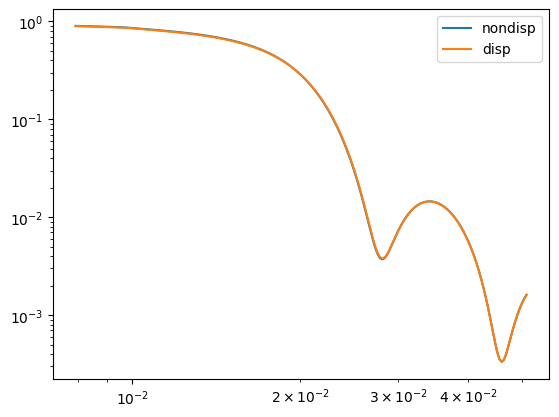

In [8]:
plt.plot(qq, model_nondisp(qq), label='nondisp')

# note how we provide theta and wavelength to the ReflectModelTL object.
plt.plot(qq, model_disp(np.c_[theta, wavelength]), label='disp')
plt.yscale('log')
plt.xscale('log')
plt.legend();

To reassure ourselves let's loko at the slab representation of the the dispersive `Structure` at two different wavelengths. We can see that the real and imaginary components of the SLD (second column) do change, just not by much.

In [9]:
print(s_disp.slabs(wavelength=2.8))
print()
print(s_disp.slabs(wavelength=18.0))

[[  0.           0.           0.           0.           0.        ]
 [300.           6.54468625   0.73189622   5.           0.        ]
 [  0.           2.07         0.           3.           0.        ]]

[[  0.           0.           0.           0.           0.        ]
 [300.           6.47192866   0.64839038   5.           0.        ]
 [  0.           2.07         0.           3.           0.        ]]


For comparison here is the non-dispersive system.

In [10]:
print(s_nondisp.slabs(wavelength=2.8))
print()
print(s_nondisp.slabs(wavelength=18.0))

[[  0.     0.     0.     0.     0.  ]
 [300.     6.5    0.68   5.     0.  ]
 [  0.     2.07   0.     3.     0.  ]]

[[  0.     0.     0.     0.     0.  ]
 [300.     6.5    0.68   5.     0.  ]
 [  0.     2.07   0.     3.     0.  ]]
